In [145]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import missingno as msno
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn import preprocessing
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import classification_report


# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('../input/heart-disease-prediction-using-logistic-regression/framingham.csv'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [146]:
#Fazendo o carregamento do Dataset doenças cardíacas
dados = pd.read_csv('../input/heart-disease-prediction-using-logistic-regression/framingham.csv')

In [147]:
#Verificando quantidade de instâncias e variáveis
dados.shape

(4238, 16)

In [148]:
#Mostrando os primeiros 05 registros
dados.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


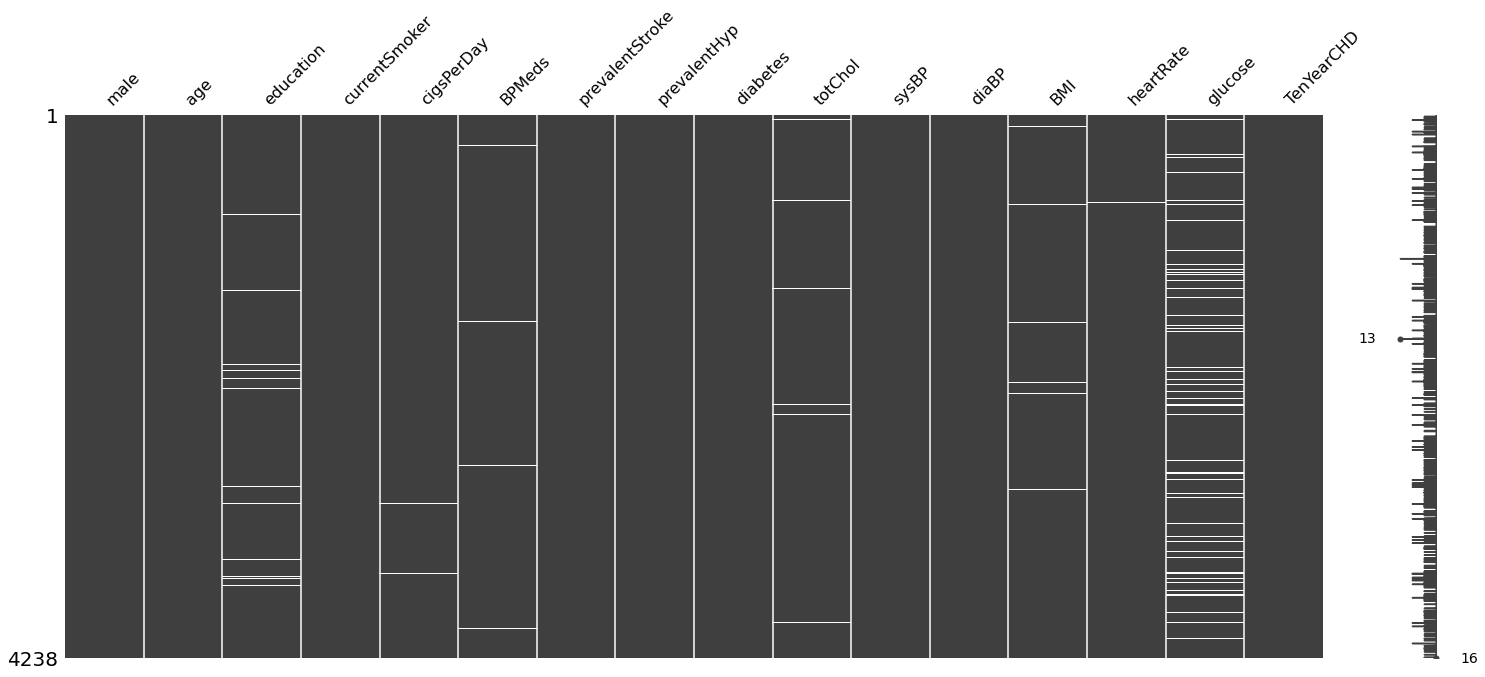

In [149]:
#Mostrando graficamente a ocorrência de dados missing 
msno.matrix(dados)

In [150]:
#Quantificando a ocorrência de dados missing
dados.isnull().sum()

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

In [151]:
#Avaliando a distribuição de ocorrências de casos cardíacos no Dataset
dados['TenYearCHD'].value_counts()

0    3594
1     644
Name: TenYearCHD, dtype: int64

Text(0.5, 1.0, 'Contagem de casos de cardiologia')

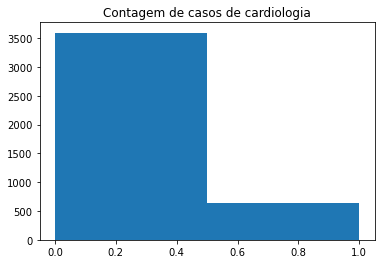

In [152]:
#Plotando a ocorência de doenças cardíacas verificando uma maior prevalência de ocorrência negativa
plt.hist(dados['TenYearCHD'], bins=2)
plt.title("Contagem de casos de cardiologia")


In [153]:
#Plotando a correlação entre as variáveis
correlation = dados.corr(method='pearson')
correlation

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
male,1.000000,-0.028979,0.017352,0.197596,0.317930,-0.052506,-0.004546,0.005313,0.015708,-0.070322,-0.035989,0.057933,0.081672,-0.116620,0.006083,0.088428
age,-0.028979,1.000000,-0.165883,-0.213748,-0.192791,0.122995,0.057655,0.307194,0.101258,0.262131,0.394302,0.206104,0.135800,-0.012823,0.122256,0.225256
education,0.017352,-0.165883,1.000000,0.018532,0.008085,-0.010815,-0.035112,-0.081970,-0.038680,-0.023115,-0.129631,-0.062316,-0.137504,-0.054206,-0.035721,-0.054059
currentSmoker,0.197596,-0.213748,0.018532,1.000000,0.769690,-0.048938,-0.032988,-0.103260,-0.044295,-0.046562,-0.130230,-0.107746,-0.167650,0.062356,-0.056826,0.019456
cigsPerDay,0.317930,-0.192791,0.008085,0.769690,1.000000,-0.046134,-0.032707,-0.066146,-0.037067,-0.026320,-0.088780,-0.056632,-0.092856,0.075157,-0.058960,0.057884
BPMeds,-0.052506,0.122995,-0.010815,-0.048938,-0.046134,1.000000,0.117365,0.261187,0.052047,0.080558,0.254219,0.194227,0.100668,0.015233,0.051176,0.087489
prevalentStroke,-0.004546,0.057655,-0.035112,-0.032988,-0.032707,0.117365,1.000000,0.074830,0.006949,0.000067,0.057009,0.045190,0.025891,-0.017676,0.018431,0.061810
prevalentHyp,0.005313,0.307194,-0.081970,-0.103260,-0.066146,0.261187,0.074830,1.000000,0.077808,0.163993,0.696755,0.615751,0.301318,0.147261,0.086834,0.177603
diabetes,0.015708,0.101258,-0.038680,-0.044295,-0.037067,0.052047,0.006949,0.077808,1.000000,0.040278,0.111283,0.050329,0.087036,0.048994,0.617627,0.097317
totChol,-0.070322,0.262131,-0.023115,-0.046562,-0.026320,0.080558,0.000067,0.163993,0.040278,1.000000,0.208908,0.165182,0.115767,0.091125,0.046408,0.082184


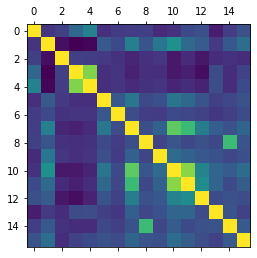

In [154]:
#Plotando a matriz da correlação
plt.matshow(dados.corr())
plt.show()

In [155]:
#Usando um novo estilo para apresentar a matriz de correlação, nesta representação os valores em laranja representam as variáveis com 
#maior correlação positiva entre as variáveis indenpendentes

#Pode-se verificar também que as variáveis age,prevalentHyp,sysBP,diaBP,glucose são as que apresentar mais correlação com a variável target TenYearCHD

#Sendo possivelmente estas variáveis as que estão relacionadas aos casos de problemas cardíacos, tomando como base os dados históricos do dataset
corr = dados.corr()
corr.style.background_gradient(cmap='coolwarm')

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
male,1.000000,-0.028979,0.017352,0.197596,0.317930,-0.052506,-0.004546,0.005313,0.015708,-0.070322,-0.035989,0.057933,0.081672,-0.116620,0.006083,0.088428
age,-0.028979,1.000000,-0.165883,-0.213748,-0.192791,0.122995,0.057655,0.307194,0.101258,0.262131,0.394302,0.206104,0.135800,-0.012823,0.122256,0.225256
education,0.017352,-0.165883,1.000000,0.018532,0.008085,-0.010815,-0.035112,-0.081970,-0.038680,-0.023115,-0.129631,-0.062316,-0.137504,-0.054206,-0.035721,-0.054059
currentSmoker,0.197596,-0.213748,0.018532,1.000000,0.769690,-0.048938,-0.032988,-0.103260,-0.044295,-0.046562,-0.130230,-0.107746,-0.167650,0.062356,-0.056826,0.019456
cigsPerDay,0.317930,-0.192791,0.008085,0.769690,1.000000,-0.046134,-0.032707,-0.066146,-0.037067,-0.026320,-0.088780,-0.056632,-0.092856,0.075157,-0.058960,0.057884
BPMeds,-0.052506,0.122995,-0.010815,-0.048938,-0.046134,1.000000,0.117365,0.261187,0.052047,0.080558,0.254219,0.194227,0.100668,0.015233,0.051176,0.087489
prevalentStroke,-0.004546,0.057655,-0.035112,-0.032988,-0.032707,0.117365,1.000000,0.074830,0.006949,0.000067,0.057009,0.045190,0.025891,-0.017676,0.018431,0.061810
prevalentHyp,0.005313,0.307194,-0.081970,-0.103260,-0.066146,0.261187,0.074830,1.000000,0.077808,0.163993,0.696755,0.615751,0.301318,0.147261,0.086834,0.177603
diabetes,0.015708,0.101258,-0.038680,-0.044295,-0.037067,0.052047,0.006949,0.077808,1.000000,0.040278,0.111283,0.050329,0.087036,0.048994,0.617627,0.097317
totChol,-0.070322,0.262131,-0.023115,-0.046562,-0.026320,0.080558,0.000067,0.163993,0.040278,1.000000,0.208908,0.165182,0.115767,0.091125,0.046408,0.082184


In [156]:
#Montando um dataset com os dados com maior correlação
analise = dados[["age","currentSmoker","prevalentHyp","sysBP","diaBP","glucose", "TenYearCHD"]]
analise

,age,currentSmoker,prevalentHyp,sysBP,diaBP,glucose,TenYearCHD
0,39,0,0,106.0,70.0,77.0,0
1,46,0,0,121.0,81.0,76.0,0
2,48,1,0,127.5,80.0,70.0,0
3,61,1,1,150.0,95.0,103.0,1
4,46,1,0,130.0,84.0,85.0,0
...,...,...,...,...,...,...,...
4233,50,1,1,179.0,92.0,86.0,1
4234,51,1,0,126.5,80.0,68.0,0
4235,48,1,0,131.0,72.0,86.0,0
4236,44,1,0,126.5,87.0,NaN,0


In [157]:
#Verificando a ocorrência de dados missing
analise.isnull().sum()

age                0
currentSmoker      0
prevalentHyp       0
sysBP              0
diaBP              0
glucose          388
TenYearCHD         0
dtype: int64

In [158]:
#Calculando índice glicêmico médio do dataset e substituindo os dados missing pela média
IGM = dados["glucose"].mean()
IGM
analise.update(analise['glucose'].fillna(IGM))

/opt/conda/lib/python3.7/site-packages/pandas/core/frame.py:5732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[col] = expressions.where(mask, this, that)


In [159]:
#Depois de tratato o dados de glucose considerando a média nos valores faltantes, nosso dataset está pronto
analise.isnull().sum()

age              0
currentSmoker    0
prevalentHyp     0
sysBP            0
diaBP            0
glucose          0
TenYearCHD       0
dtype: int64

In [160]:
#Analisando a estatística dos dados
analise.describe()

,age,currentSmoker,prevalentHyp,sysBP,diaBP,glucose,TenYearCHD
count,4238.000000,4238.000000,4238.000000,4238.000000,4238.000000,4238.000000,4238.000000
mean,49.584946,0.494101,0.310524,132.352407,82.893464,81.966753,0.151958
std,8.572160,0.500024,0.462763,22.038097,11.910850,22.836603,0.359023
min,32.000000,0.000000,0.000000,83.500000,48.000000,40.000000,0.000000
25%,42.000000,0.000000,0.000000,117.000000,75.000000,72.000000,0.000000
50%,49.000000,0.000000,0.000000,128.000000,82.000000,80.000000,0.000000
75%,56.000000,1.000000,1.000000,144.000000,89.875000,85.000000,0.000000
max,70.000000,1.000000,1.000000,295.000000,142.500000,394.000000,1.000000


In [161]:
#Dividindo o dataset em dados de entrada (variáveis preditoras) e dados de saída (variável target)

entradas = analise[['age','currentSmoker','prevalentHyp','sysBP','diaBP','glucose']]
saidas = analise[["TenYearCHD"]]

In [162]:
#Verificando as estatísticas dos dados de entrada
entradas.describe()


,age,currentSmoker,prevalentHyp,sysBP,diaBP,glucose
count,4238.000000,4238.000000,4238.000000,4238.000000,4238.000000,4238.000000
mean,49.584946,0.494101,0.310524,132.352407,82.893464,81.966753
std,8.572160,0.500024,0.462763,22.038097,11.910850,22.836603
min,32.000000,0.000000,0.000000,83.500000,48.000000,40.000000
25%,42.000000,0.000000,0.000000,117.000000,75.000000,72.000000
50%,49.000000,0.000000,0.000000,128.000000,82.000000,80.000000
75%,56.000000,1.000000,1.000000,144.000000,89.875000,85.000000
max,70.000000,1.000000,1.000000,295.000000,142.500000,394.000000


In [163]:
#Normalizando os dados de entrada já que este processo é importante para os classificadores
entradas = preprocessing.scale(entradas)

In [164]:
#Apresetando as variáveis preditoras normalizadas
entradas

array([[-1.23495068, -0.98827076, -0.67110093, -1.19590711, -1.08262515,
        -0.21751656],
       [-0.41825733, -0.98827076, -0.67110093, -0.51518725, -0.15898843,
        -0.26131108],
       [-0.18491638,  1.01186844, -0.67110093, -0.22020864, -0.24295541,
        -0.52407818],
       ...,
       [-0.18491638,  1.01186844, -0.67110093, -0.06137401, -0.9146912 ,
         0.17663409],
       [-0.65159829,  1.01186844, -0.67110093, -0.26558997,  0.34481341,
         0.        ],
       [ 0.28176554, -0.98827076, -0.67110093,  0.0520793 ,  0.00894551,
         1.09631895]])

In [165]:
#Realizando o reshape dos dados e separando em 80% para treinamento e 20% para teste
#analise, target = np.arange(10).reshape((5, 2)), range(5)

data_train, data_test, target_train, target_test = train_test_split(entradas,saidas, test_size=0.20, random_state=42)

In [166]:
#Instanciando e treinando o modelo de arvore 
clf = tree.DecisionTreeClassifier() # instância do classificador
clf.fit(data_train, target_train) # fit encontra padrões nos dados para o argoritmo de árvore de decisão 
cRF = RandomForestClassifier() # instância do classificador
cRF.fit(data_train, target_train)  #fit encontra padrões nos dados para o argoritmo Randon Forest
cXGB = xgb.XGBClassifier() # instância do classificador
cXGB.fit(data_train, target_train) #fit encontra padrões nos dados para o argoritmo xgBoost

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """
/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [167]:
#Realizando a predição dos dados de teste como o modelo já treinado 
previsao = clf.predict(data_test)
previsao
previsaoRF = cRF.predict(data_test)
previsaoRF
previsaoXGB = cXGB.predict(data_test)

[Text(182.51684251181203, 213.41333333333333, 'X[0] <= -0.127\ngini = 0.26\nsamples = 3390\nvalue = [2870, 520]'),
 Text(89.35737312458555, 205.36, 'X[5] <= 6.111\ngini = 0.143\nsamples = 1681\nvalue = [1551, 130]'),
 Text(88.78901238187999, 197.30666666666667, 'X[3] <= 2.707\ngini = 0.139\nsamples = 1677\nvalue = [1551, 126]'),
 Text(66.90753139505969, 189.25333333333333, 'X[4] <= 0.576\ngini = 0.134\nsamples = 1669\nvalue = [1548, 121]'),
 Text(38.552473930702924, 181.2, 'X[3] <= -2.069\ngini = 0.114\nsamples = 1365\nvalue = [1282, 83]'),
 Text(37.98411318799735, 173.14666666666668, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(39.120834673408496, 173.14666666666668, 'X[1] <= 0.012\ngini = 0.113\nsamples = 1364\nvalue = [1282, 82]'),
 Text(9.795342175066313, 165.09333333333333, 'X[4] <= -0.348\ngini = 0.063\nsamples = 525\nvalue = [508, 17]'),
 Text(4.262705570291778, 157.04, 'X[5] <= -0.371\ngini = 0.031\nsamples = 252\nvalue = [248, 4]'),
 Text(2.2734429708222814, 148.986666666

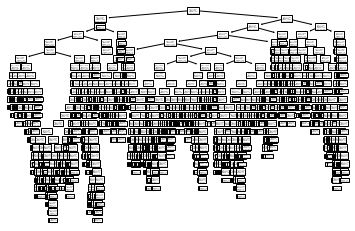

In [168]:
#Mostrando a árvore de decisão
tree.plot_tree(clf) 

In [169]:
#Avaliando a acurácia modelo de árvore de decisão
from sklearn.metrics import accuracy_score
accuracy_score(target_test, previsao)* 100


74.64622641509435

In [170]:
#Avaliando o modelo de RandonForest
accuracy_score(target_test, previsaoRF)* 100


83.72641509433963

In [171]:
#Avaliando a acurácia do Algoritmo XGBOOST
accuracy_score(target_test, previsaoXGB)* 100

83.01886792452831

In [172]:
# O modelo apresenta desbalanceamento nos dados de saída, desta forma a acurácia não é a melhor métrica de avaliação
# A matriz de confusão pode ser uma saída.
dados['TenYearCHD'].value_counts()

0    3594
1     644
Name: TenYearCHD, dtype: int64

In [173]:
#Imprimindo métricas do algoritmo de árvore de decisão
from sklearn.metrics import confusion_matrix
print ('Accuracy:', accuracy_score(target_test, previsao))
print ('F1 score:', f1_score(target_test, previsao,average='weighted'))
print ('Recall:', recall_score(target_test, previsao,
                              average='weighted'))
print ('Precision:', precision_score(target_test, previsao,
                                    average='weighted'))
print ('\n clasification report:\n', classification_report(target_test, previsao))
print ('\n confussion matrix:\n',confusion_matrix(target_test, previsao))


Accuracy: 0.7464622641509434
F1 score: 0.7595957754729414
Recall: 0.7464622641509434
Precision: 0.7749566244314605

 clasification report:
               precision    recall  f1-score   support

           0       0.87      0.83      0.85       724
           1       0.22      0.28      0.25       124

    accuracy                           0.75       848
   macro avg       0.54      0.55      0.55       848
weighted avg       0.77      0.75      0.76       848


 confussion matrix:
 [[598 126]
 [ 89  35]]


In [174]:
#Imprimindo métricas do algoritmo Randon Forest
from sklearn.metrics import confusion_matrix
print ('Accuracy:', accuracy_score(target_test, previsaoRF))
print ('F1 score:', f1_score(target_test, previsaoRF,average='weighted'))
print ('Recall:', recall_score(target_test, previsaoRF,
                              average='weighted'))
print ('Precision:', precision_score(target_test, previsaoRF,
                                    average='weighted'))
print ('\n clasification report:\n', classification_report(target_test, previsaoRF))
print ('\n confussion matrix:\n',confusion_matrix(target_test, previsaoRF))

Accuracy: 0.8372641509433962
F1 score: 0.7925581869859087
Recall: 0.8372641509433962
Precision: 0.7716942688871461

 clasification report:
               precision    recall  f1-score   support

           0       0.86      0.97      0.91       724
           1       0.27      0.06      0.10       124

    accuracy                           0.84       848
   macro avg       0.56      0.52      0.51       848
weighted avg       0.77      0.84      0.79       848


 confussion matrix:
 [[702  22]
 [116   8]]


In [175]:
#Imprimindo métricas do algoritmo do algoritmo XGBOOST
from sklearn.metrics import confusion_matrix
print ('Accuracy:', accuracy_score(target_test, previsaoXGB))
print ('F1 score:', f1_score(target_test, previsaoXGB,average='weighted'))
print ('Recall:', recall_score(target_test, previsaoXGB,
                              average='weighted'))
print ('Precision:', precision_score(target_test, previsaoXGB,
                                    average='weighted'))
print ('\n clasification report:\n', classification_report(target_test, previsaoXGB))
print ('\n confussion matrix:\n',confusion_matrix(target_test, previsaoXGB))

Accuracy: 0.8301886792452831
F1 score: 0.7969063652036914
Recall: 0.8301886792452831
Precision: 0.7790290880503145

 clasification report:
               precision    recall  f1-score   support

           0       0.86      0.95      0.91       724
           1       0.29      0.11      0.16       124

    accuracy                           0.83       848
   macro avg       0.58      0.53      0.53       848
weighted avg       0.78      0.83      0.80       848


 confussion matrix:
 [[690  34]
 [110  14]]


In [ ]:
#Neste caso o melhor resultado foi alcançado como algoritmo XGBOOST, lembrando que para este experimento foram utitlizados todos os algoritmos 
#com hiperparâmetros default.

In [176]:
#Percebe-se que o resultado sofre impacto deste desbalanceamento o que caracterizamos como víes nos dados. Podemos solucinar 
#utilizando os métodos class weight, undersampling, oversamoling e SMOTE, no entanto a técnica de balanceamento será realizada em outro artigo.